In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Glass%20Identification/Glass%20Identification.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
#checking the Total No of Rows and Columns
df.shape

(214, 11)

In [4]:
"""Now First rename the column headers with appropriate attribute names"""

'Now First rename the column headers with appropriate attribute names'

In [5]:
df1=['ID','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type']
df.columns=df1
df.head()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [6]:
df.tail()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [7]:
"""here we are converting the dataset into 2 classes- Window Glass and Non-Window Glass(classes 1-4 are window glasses whereas
 classes 5-7 are Non-Window Glasses )
 Here we set 0: for window glasses and 1:for Non-Window glasses using map function"""

df['Type']=df['Type'].map({1:0,2:0,3:0,4:0,5:1,6:1,7:1})
df.head()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,0
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,0
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,0
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,0
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,0


In [8]:
df.tail()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,1
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,1
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,1
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,1
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,1


In [9]:
#checking for null values
df.isnull().sum()

ID      0
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [10]:
"""No null values present in dataset"""

'No null values present in dataset'

In [11]:
#checking for duplicated value
df.duplicated().sum()

0

In [12]:
"""Duplicate values are not present"""

'Duplicate values are not present'

In [13]:
#checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

ID
1      1
135    1
137    1
138    1
139    1
      ..
75     1
76     1
77     1
78     1
214    1
Name: count, Length: 214, dtype: int64


RI
1.52152    3
1.51590    3
1.51645    3
1.51754    2
1.51841    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: count, Length: 178, dtype: int64


Na
13.02    5
13.21    5
13.00    5
13.64    4
13.33    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: count, Length: 142, dtype: int64


Mg
0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
2.76     1
3.15     1
2.90     1
3.83     1
1.78     1
Name: count, Length: 94, dtype: int64


Al
1.54    8
1.19    6
1.43    5
1.29    5
1.23    5
       ..
1.08    1
1.64    1
1.61    1
1.07    1
1.94    1
Name: count, Length: 118, dtype: int64


Si
72.86    4
72.99    4
73.10    4
73.28    4
73.11    4
        ..
73.55    1
72.34    1
72.26    1
73.26    1
73.61    1
Name: count, Length: 133, dtype: int64


K
0.00    30
0.57    1

In [14]:
#checking no of unique values in each col
df.nunique().to_frame("No of unique values")

,No of unique values
ID,214
RI,178
Na,142
Mg,94
Al,118
Si,133
K,65
Ca,143
Ba,34
Fe,32


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  Type    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [16]:
#statistical summary of dataset
df.describe()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,0.238318
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,0.427053
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,0.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,0.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,0.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,0.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,1.000000


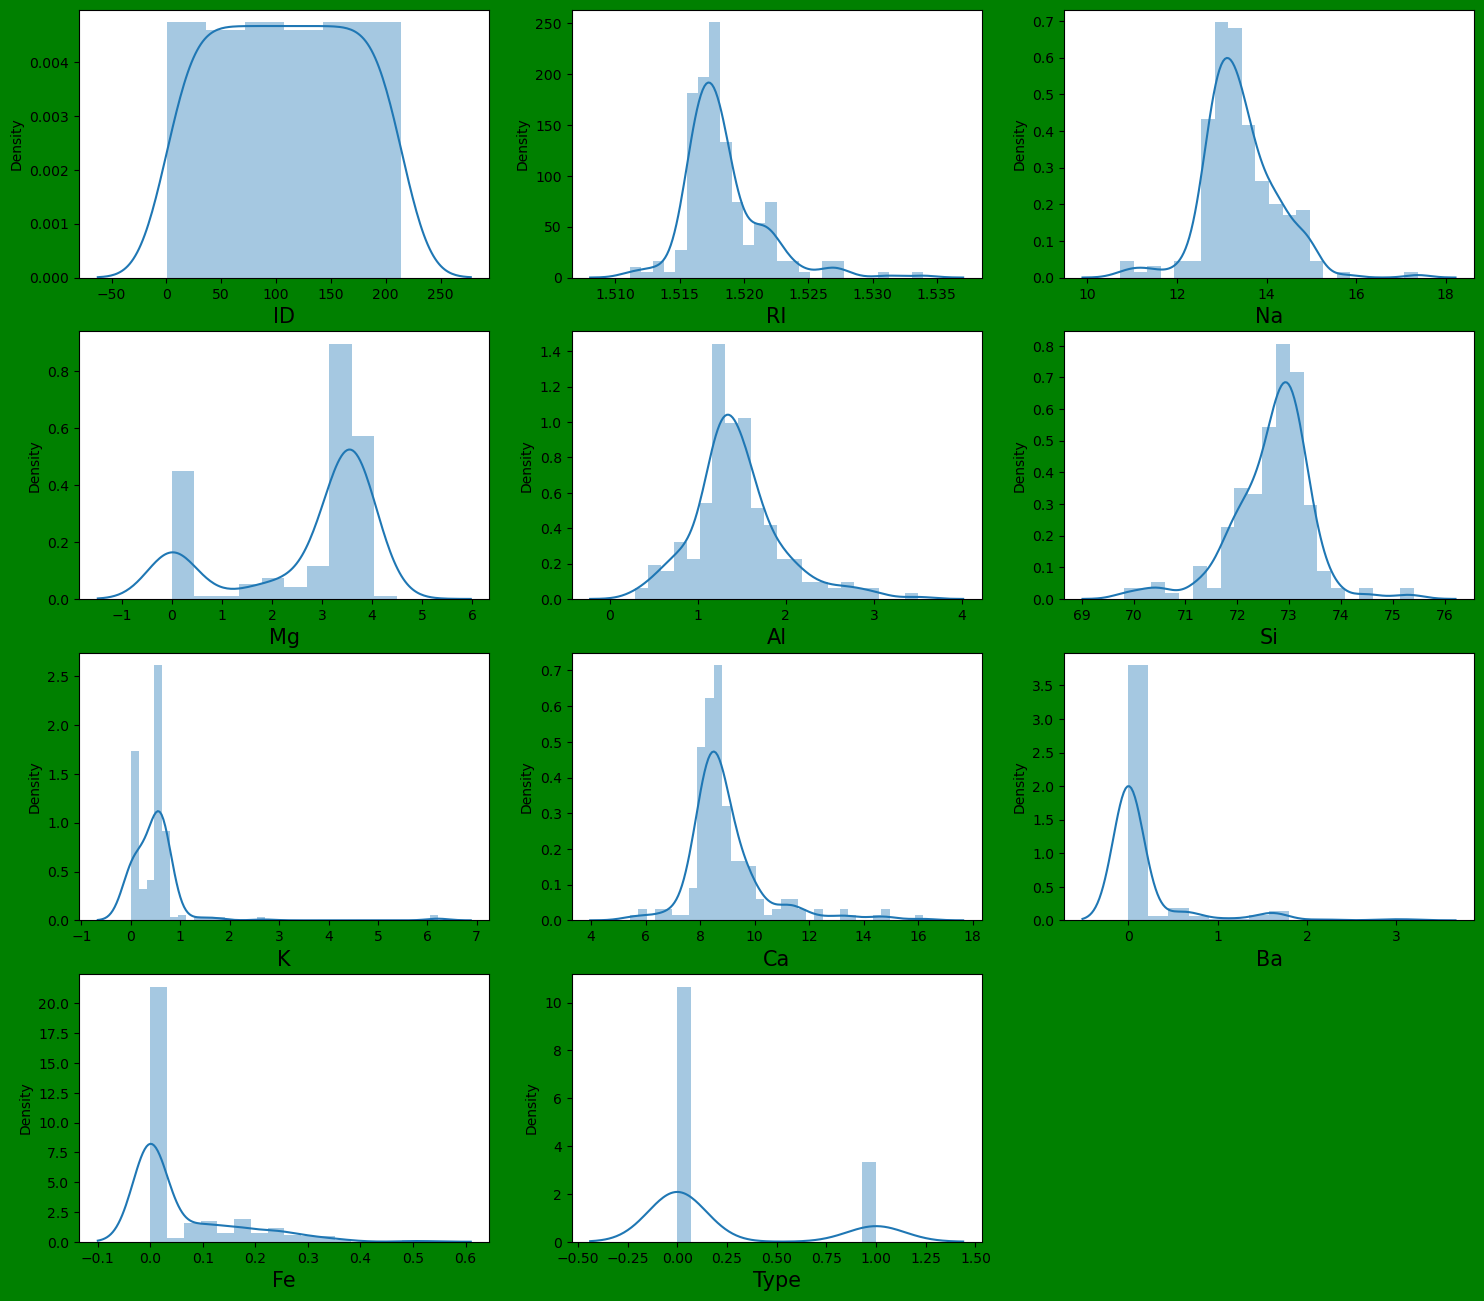

In [17]:
#lets see how data is distributed for every column
plt.figure(figsize=(18,16),facecolor="g")
p=1
for col in df:
    if p<=11:
        ax=plt.subplot(4,3,p)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=15)
    p+=1
plt.show()

Type
0    163
1     51
Name: count, dtype: int64


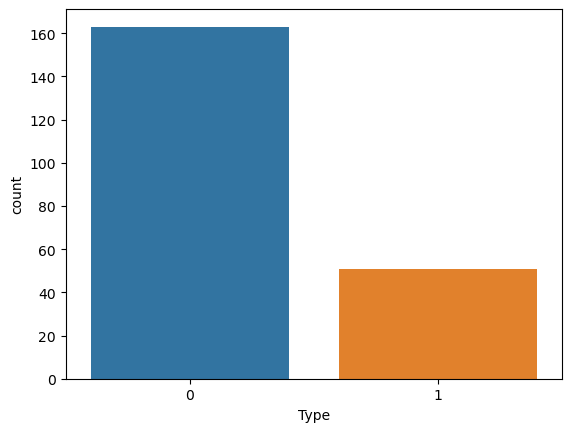

In [18]:
#counting Glass type
ax=sns.countplot(x='Type',data=df)
print(df['Type'].value_counts())

In [19]:
"""Here we can see the count of window glass is higher than the Non-Window glass."""

'Here we can see the count of window glass is higher than the Non-Window glass.'

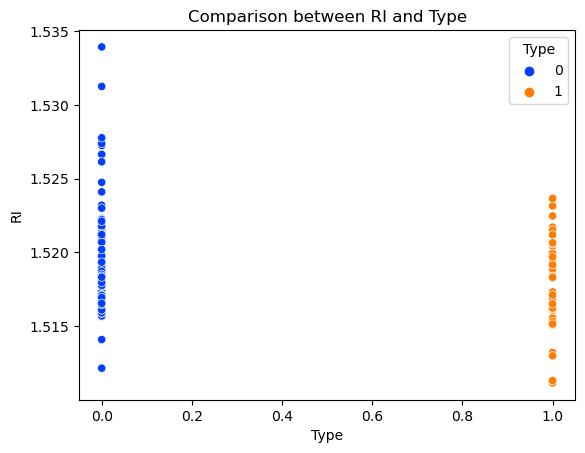

In [20]:
#comparing RI with Type
plt.title("Comparison between RI and Type")
sns.scatterplot(x="Type",y="RI",data=df,hue="Type",palette='bright')
plt.show()

In [21]:
"""Here we can see the RI in window glass type is higher than the Non-window glass type"""

'Here we can see the RI in window glass type is higher than the Non-window glass type'

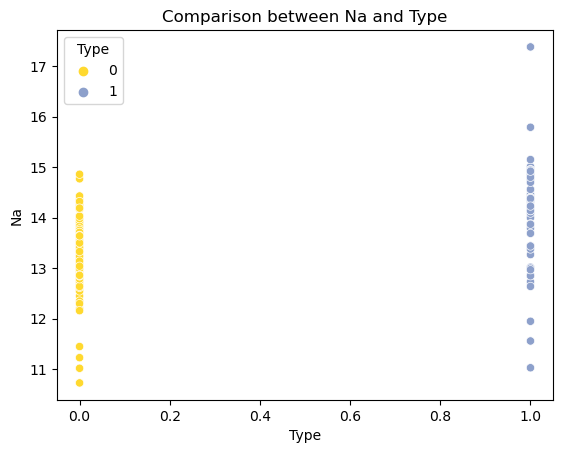

In [22]:
#comparing Type and Sodium
plt.title("Comparison between Na and Type")
sns.scatterplot(x="Type",y="Na",data=df,hue="Type",palette='Set2_r')
plt.show()

In [23]:
"""The Na range in Non-window glass is little bit higher than the window glass"""

'The Na range in Non-window glass is little bit higher than the window glass'

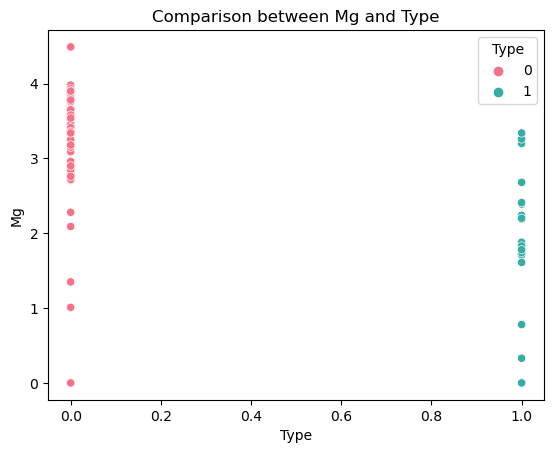

In [24]:
#comparing Type and Magnesium
plt.title("Comparison between Mg and Type")
sns.scatterplot(x="Type",y="Mg",data=df,hue="Type",palette='husl')
plt.show()

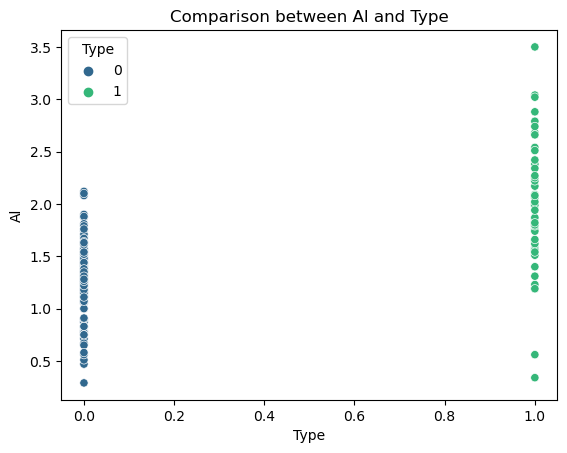

In [25]:
#comparing Type and Aluminium
plt.title("Comparison between Al and Type")
sns.scatterplot(x="Type",y="Al",data=df,hue="Type",palette='viridis')
plt.show()

In [26]:
"""Here we can see the Al in non-window glass is higher than window glass"""

'Here we can see the Al in non-window glass is higher than window glass'

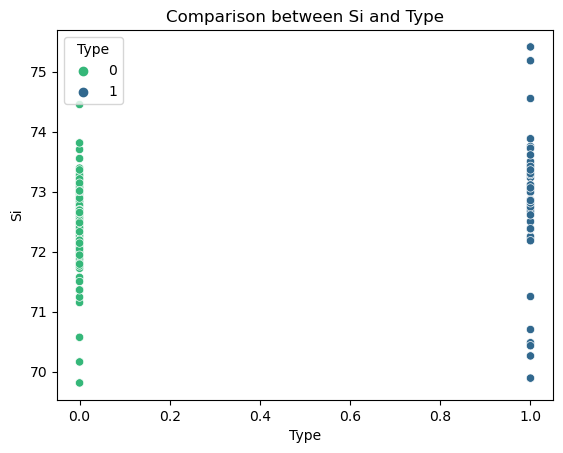

In [27]:
#comparing Type and Silicon
plt.title("Comparison between Si and Type")
sns.scatterplot(x="Type",y="Si",data=df,hue="Type",palette='viridis_r')
plt.show()

In [28]:
"""The silicon in both glasses is almost equal."""

'The silicon in both glasses is almost equal.'

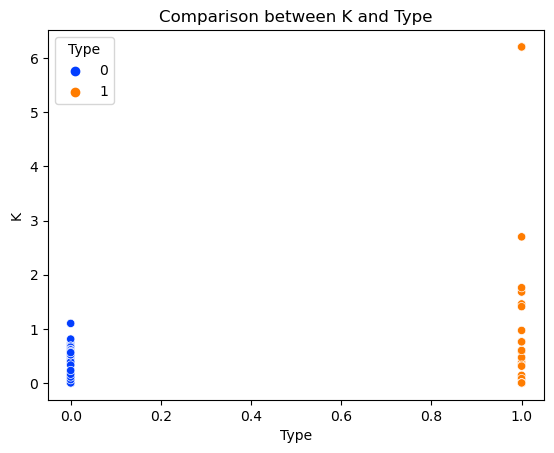

In [29]:
#comparing Type and Potassium
plt.title("Comparison between K and Type")
sns.scatterplot(x="Type",y="K",data=df,hue="Type",palette='bright')
plt.show()

In [30]:
"""The Potassium is in both glasses are not so much. but yes, in non-window glass type little high than the window glass."""

'The Potassium is in both glasses are not so much. but yes, in non-window glass type little high than the window glass.'

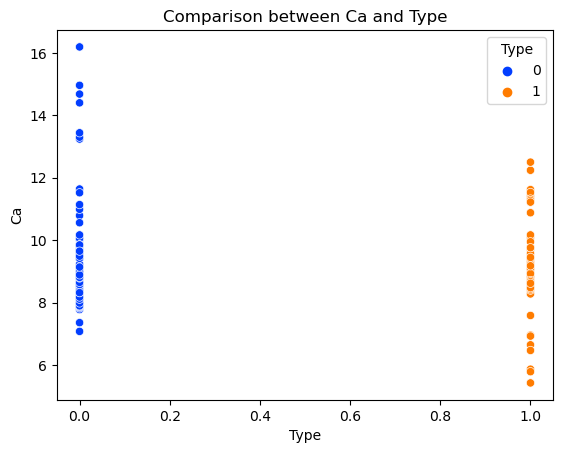

In [31]:
#comparing Type and Calcium
plt.title("Comparison between Ca and Type")
sns.scatterplot(x="Type",y="Ca",data=df,hue="Type",palette='bright')
plt.show()

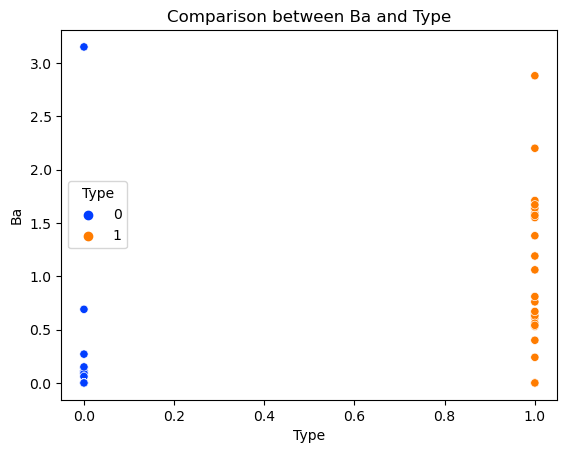

In [32]:
#comparing Type and Barium
plt.title("Comparison between Ba and Type")
sns.scatterplot(x="Type",y="Ba",data=df,hue="Type",palette='bright')
plt.show()

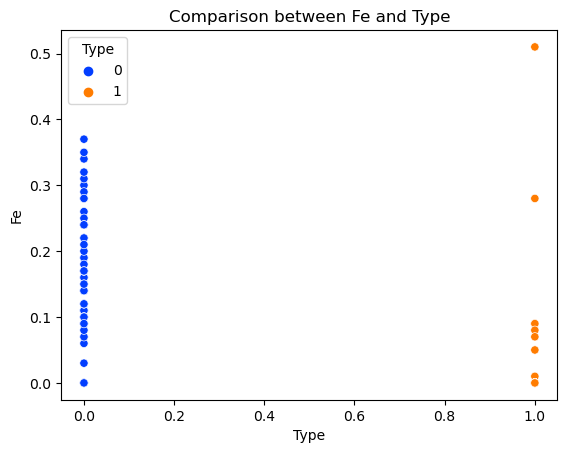

In [33]:
#comparing Type and Iron
plt.title("Comparison between Fe and Type")
sns.scatterplot(x="Type",y="Fe",data=df,hue="Type",palette='bright')
plt.show()

In [34]:
"""Fe in window glass is higher than the non-window glass """

'Fe in window glass is higher than the non-window glass '

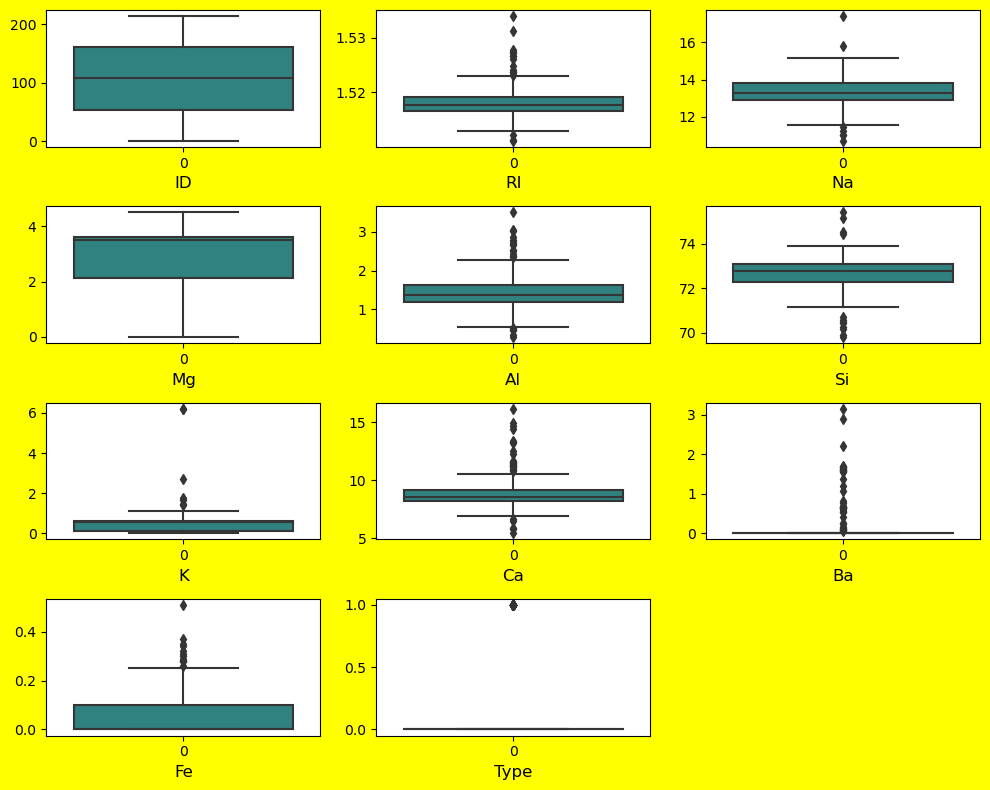

In [35]:
#checking the outliers using boxplot
plt.figure(figsize=(10,8),facecolor="Yellow")
plotnumber=1
for col in df:
    if plotnumber<=11:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(df[col],palette="viridis_r")
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [36]:
"""From the above observations we can see the outliers are present in all columns except the ID and Magnesium column. 
using zscore and IQR Technique we can remove outliers"""

'From the above observations we can see the outliers are present in all columns except the ID and Magnesium column. \nusing zscore and IQR Technique we can remove outliers'

In [37]:
from scipy.stats import zscore
z_score=zscore(df[['RI','Na','Al','Si','K','Ca','Ba','Fe']])
abs_z_score=np.abs(z_score)
filtering_entry=(abs_z_score<3).all(axis=1)
df=df[filtering_entry]

In [38]:
#after removing outliers
df.shape

(194, 11)

In [39]:
"""After removing the outliers dataset contains 194 rows and 11 columns """

'After removing the outliers dataset contains 194 rows and 11 columns '

In [40]:
#ID column not contain some important data so we will drop the ID column 
df.drop(["ID"],axis=1,inplace=True)

In [41]:
#checking the correlation between features and target
cor=df.corr()
cor

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,0.050760,0.048147,-0.522197,-0.609011,-0.368238,0.690650,-0.193013,-0.020046,-0.060410
Na,0.050760,1.000000,-0.487729,0.253127,-0.234718,-0.612183,0.019987,0.532000,-0.209838,0.463723
Mg,0.048147,-0.487729,1.000000,-0.593457,-0.377464,0.482622,-0.455582,-0.586581,0.134065,-0.840407
Al,-0.522197,0.253127,-0.593457,1.000000,0.335262,0.005827,-0.213304,0.532061,-0.117764,0.600752
Si,-0.609011,-0.234718,-0.377464,0.335262,1.000000,0.072579,-0.165712,0.155017,0.023279,0.282746
K,-0.368238,-0.612183,0.482622,0.005827,0.072579,1.000000,-0.500579,-0.253790,0.099394,-0.396495
Ca,0.690650,0.019987,-0.455582,-0.213304,-0.165712,-0.500579,1.000000,-0.167843,-0.011635,0.288044
Ba,-0.193013,0.532000,-0.586581,0.532061,0.155017,-0.253790,-0.167843,1.000000,-0.119955,0.618309
Fe,-0.020046,-0.209838,0.134065,-0.117764,0.023279,0.099394,-0.011635,-0.119955,1.000000,-0.207574
Type,-0.060410,0.463723,-0.840407,0.600752,0.282746,-0.396495,0.288044,0.618309,-0.207574,1.000000


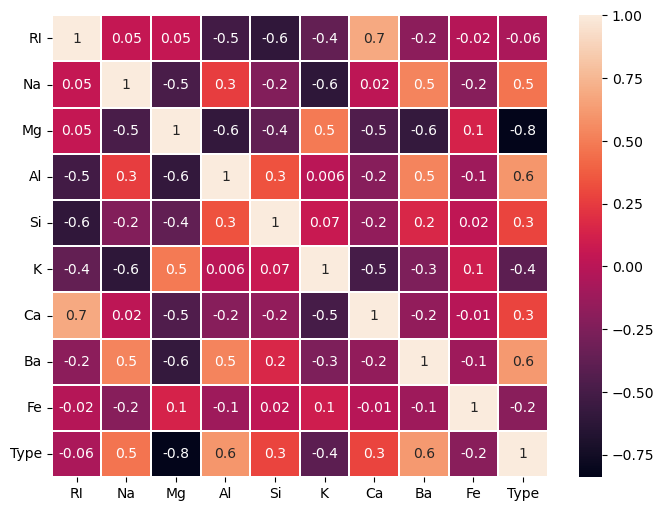

In [52]:
#visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),linewidths=0.1,fmt=".1g",linecolor="white",annot=True)
plt.yticks(rotation=0);
plt.show()

In [42]:
"""From the above observations we can say that Al,Ba,Na is highly correlated with target variable i.e. Type column.
and Mg,K are negatively correlated with target variable."""

'From the above observations we can say that Al,Ba,Na is highly correlated with target variable i.e. Type column.\nand Mg,K are negatively correlated with target variable.'

In [43]:
#We can observe the positive and negative correlated features with the target
cor['Type'].sort_values(ascending = False)

Type    1.000000
Ba      0.618309
Al      0.600752
Na      0.463723
Ca      0.288044
Si      0.282746
RI     -0.060410
Fe     -0.207574
K      -0.396495
Mg     -0.840407
Name: Type, dtype: float64

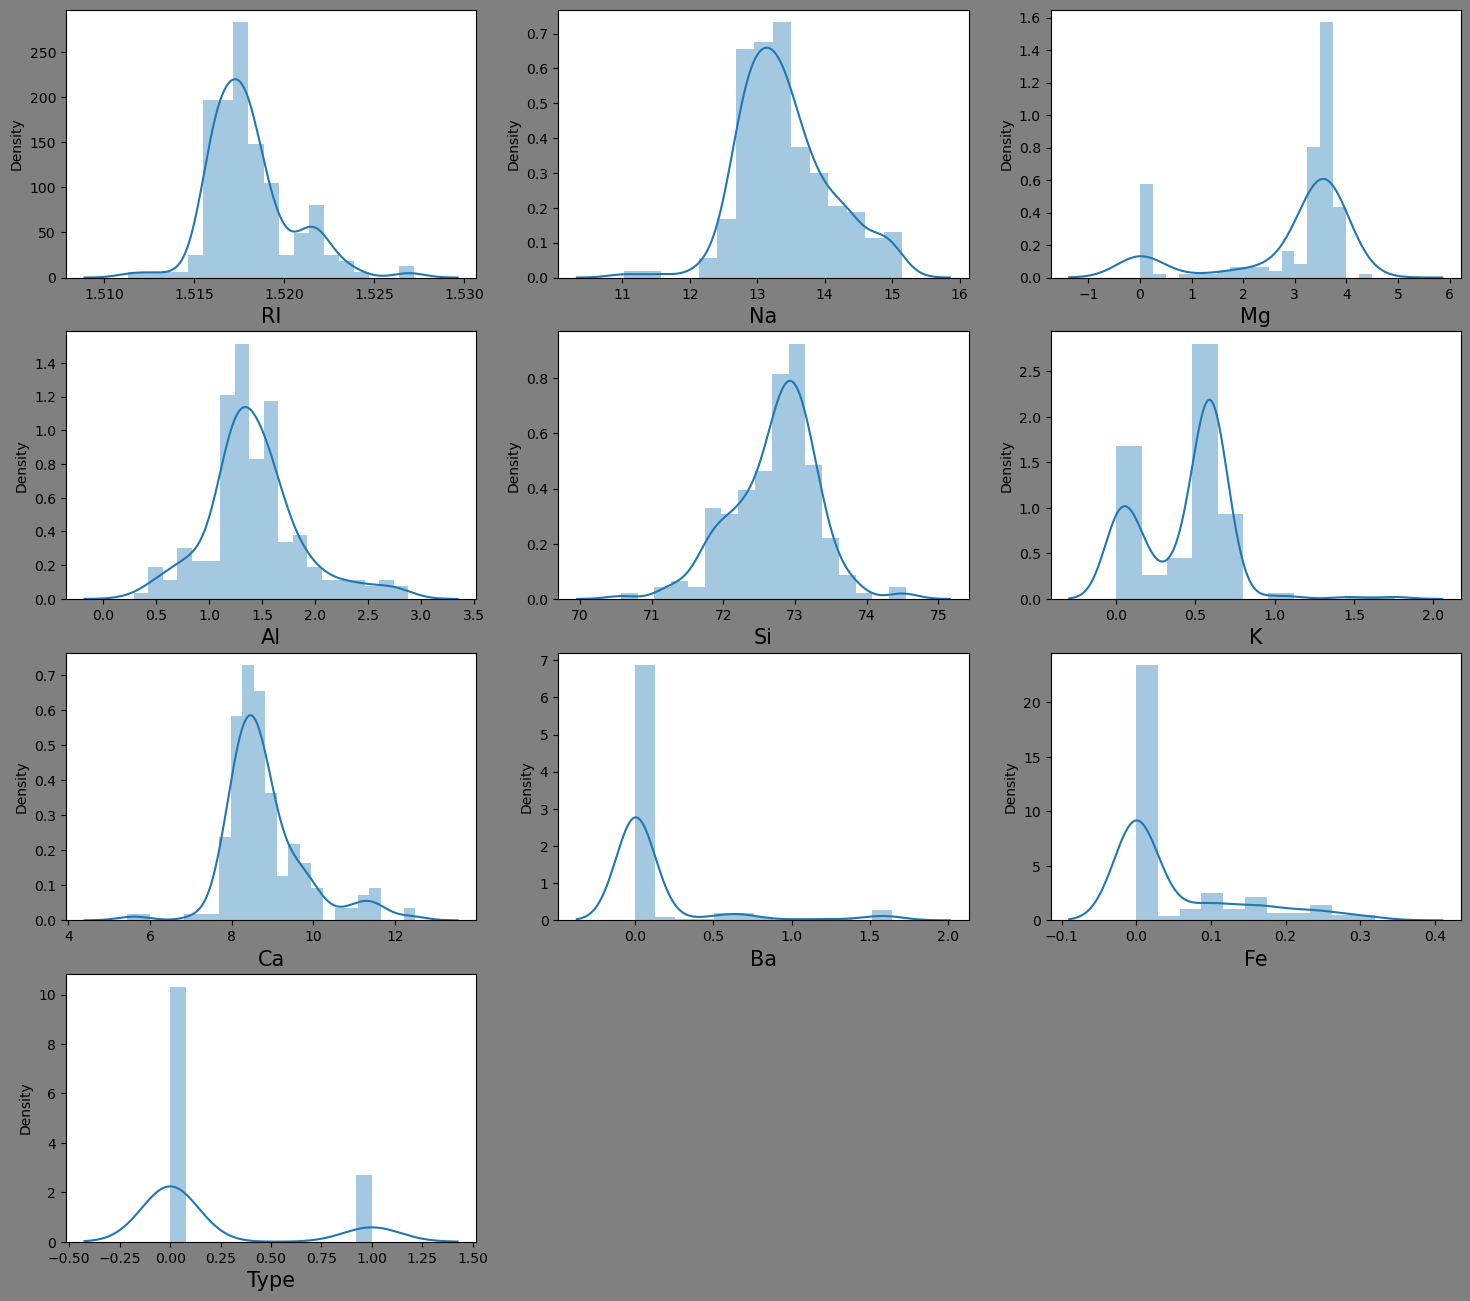

In [44]:
#Cheking For Skewness
#lets see how data is distributed for every column
plt.figure(figsize=(18,16),facecolor='grey')
p=1
for col in df:
    if p<=11:
        ax=plt.subplot(4,3,p)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=15)
    p+=1
plt.show()

In [45]:
"""Here the data is almost normally distributed in column Na,Al,Si,K.
Remaining all columns have skewness."""

#checking skewness
df.skew()

RI      0.952733
Na      0.371482
Mg     -1.528849
Al      0.658259
Si     -0.425450
K       0.303175
Ca      1.077962
Ba      3.188587
Fe      1.486479
Type    1.463837
dtype: float64

In [46]:
#Using cube root method we can remove skewness
df['RI']=np.cbrt(df['RI'])
df['Mg']=np.cbrt(df['Mg'])
df['Ca']=np.cbrt(df['Ca'])
df['Ba']=np.cbrt(df['Ba'])
df['Fe']=np.cbrt(df['Fe'])

In [47]:
#again checking skewness
df.skew()

RI      0.948045
Na      0.371482
Mg     -1.899050
Al      0.658259
Si     -0.425450
K       0.303175
Ca      0.611914
Ba      2.207594
Fe      0.883166
Type    1.463837
dtype: float64

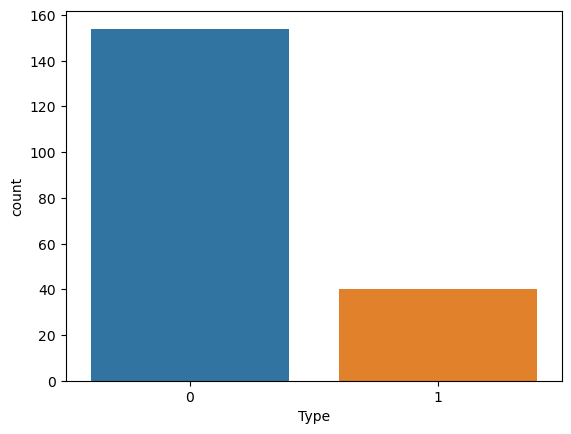

In [48]:
#checking the count of Type of glass
sns.countplot(data=df,x='Type')
plt.show()

In [49]:
"""From the above graph we can see data is imbalanced.
using SMOTE we can do resampling for balancing data 
for that first do feature scaling"""

'From the above graph we can see data is imbalanced.\nusing SMOTE we can do resampling for balancing data \nfor that first do feature scaling'

In [50]:
#separating features and label
x=df.drop("Type",axis=1)
y=df["Type"]

In [51]:
#Feature Scaling using Standard Scalarization
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.292056,0.332127,0.700169,-0.729105,-1.612464,-1.319609,-0.041137,-0.415308,-0.67803
1,-0.197444,0.704398,0.481196,-0.141722,0.016082,0.172091,-1.038165,-0.415308,-0.67803
2,-0.824575,0.168328,0.467868,0.264928,0.461790,-0.147559,-1.094542,-0.415308,-0.67803
3,-0.175524,-0.308179,0.504878,-0.299864,-0.189629,0.491741,-0.606457,-0.415308,-0.67803
4,-0.280746,-0.218834,0.486492,-0.412822,0.616073,0.420708,-0.770849,-0.415308,-0.67803
...,...,...,...,...,...,...,...,...,...
189,-0.728068,1.419158,-2.384242,2.975928,0.221793,-1.532708,0.671549,2.070338,-0.67803
190,-0.802641,1.076668,-2.384242,3.292211,-0.189629,-1.248575,0.400966,2.696958,-0.67803
191,-0.530695,2.238153,-2.384242,1.281553,0.581788,-1.532708,-0.411806,3.147347,-0.67803
192,1.134449,1.404267,-2.384242,1.349328,1.198921,-1.532708,-0.368929,3.184306,-0.67803


In [52]:
#Checking Variance Inflation Factor(VIF)
#finding variance inflation factor in each scaled col 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF Values"]=[variance_inflation_factor(x.values,i) 
for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF Values,Features
0,5.160086,RI
1,7.579510,Na
2,14.718293,Mg
3,3.519975,Al
4,5.545885,Si
5,4.105024,K
6,10.058825,Ca
7,3.601003,Ba
8,1.054416,Fe


In [1]:
"""By checking VIF values we can find the features causing multicollinarity problem.here we can
find the feature Mg,Ca have VIF value > 10 which means they have high correlation
with other features.we will drop one of the column """

'By checking VIF values we can find the features causing multicollinarity problem.here we can\nfind the feature Mg,Ca have VIF value > 10 which means they have high correlation\nwith other features.we will drop one of the column '

In [53]:
#Dropping Mg column
x.drop("Mg",axis=1,inplace=True)

In [54]:
#again checking value to confirm wether the multicollinearity still exists or not

vif=pd.DataFrame()
vif["VIF Values"]=[variance_inflation_factor(x.values,i) 
for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF Values,Features
0,5.157757,RI
1,3.282375,Na
2,2.360501,Al
3,2.679845,Si
4,3.211605,K
5,3.342818,Ca
6,2.433611,Ba
7,1.051760,Fe


In [2]:
"""so,we have solved multicollinearity issue."""

'so,we have solved multicollinearity issue.'

In [56]:
#checking the value counts of target variable i.e.Type column
y.value_counts()

Type
0    154
1     40
Name: count, dtype: int64

In [57]:
"'Here we can see that the data is not balanced,we will balance the data using oversampling method"''

"'Here we can see that the data is not balanced,we will balance the data using oversampling method"

In [58]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 = SM.fit_resample(x, y)

In [59]:
#after SMOTE() checking value count of target col
y1.value_counts()

Type
0    154
1    154
Name: count, dtype: int64

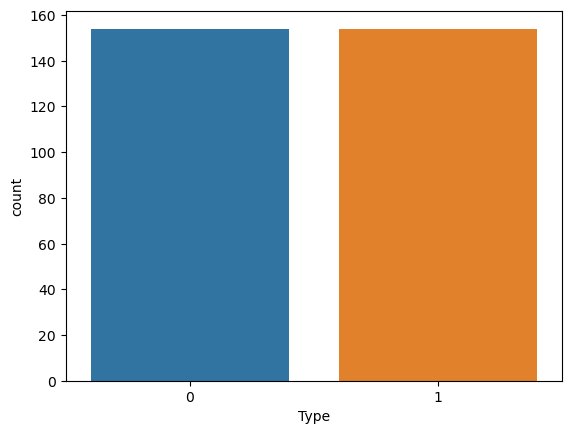

In [60]:
#checking the count of Type of glass
sns.countplot(data=df,x=y1)
plt.show()

In [61]:
#split into train test data set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=48)

In [62]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier

def metric_score(clf,x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred=clf.predict(x_train)
        print("\n----------------Train Result------------------\n")
        print(f"Accuracy Score: {accuracy_score(y_train,y_pred)*100:.2f}%")
    elif train==False:
        pred=clf.predict(x_test)
        print("\n----------------Test Result------------------\n")
        print(f"Accuracy Score: {accuracy_score(y_test,pred)*100:.2f}%")
        print('\n\n The Classification Report\n', classification_report(y_test,pred,digits=2))

In [63]:
random_clf=RandomForestClassifier()
random_clf.fit(x_train,y_train)

RandomForestClassifier()

In [64]:
metric_score(random_clf,x_train,x_test,y_train,y_test,train=True)
metric_score(random_clf,x_train,x_test,y_train,y_test,train=False)


----------------Train Result------------------

Accuracy Score: 100.00%

----------------Test Result------------------

Accuracy Score: 98.92%


 The Classification Report
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        45
           1       1.00      0.98      0.99        48

    accuracy                           0.99        93
   macro avg       0.99      0.99      0.99        93
weighted avg       0.99      0.99      0.99        93



In [67]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [68]:
metric_score(LR,x_train,x_test,y_train,y_test,train=True)
metric_score(LR,x_train,x_test,y_train,y_test,train=False)


----------------Train Result------------------

Accuracy Score: 96.28%

----------------Test Result------------------

Accuracy Score: 96.77%


 The Classification Report
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        45
           1       0.98      0.96      0.97        48

    accuracy                           0.97        93
   macro avg       0.97      0.97      0.97        93
weighted avg       0.97      0.97      0.97        93



In [69]:
from sklearn.ensemble import ExtraTreesClassifier
ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)

ExtraTreesClassifier()

In [70]:
metric_score(ETC,x_train,x_test,y_train,y_test,train=True)
metric_score(ETC,x_train,x_test,y_train,y_test,train=False)


----------------Train Result------------------

Accuracy Score: 100.00%

----------------Test Result------------------

Accuracy Score: 98.92%


 The Classification Report
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        45
           1       1.00      0.98      0.99        48

    accuracy                           0.99        93
   macro avg       0.99      0.99      0.99        93
weighted avg       0.99      0.99      0.99        93



In [71]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [72]:
metric_score(svc,x_train,x_test,y_train,y_test,train=True)
metric_score(svc,x_train,x_test,y_train,y_test,train=False)


----------------Train Result------------------

Accuracy Score: 98.60%

----------------Test Result------------------

Accuracy Score: 98.92%


 The Classification Report
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        45
           1       1.00      0.98      0.99        48

    accuracy                           0.99        93
   macro avg       0.99      0.99      0.99        93
weighted avg       0.99      0.99      0.99        93



In [73]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [74]:
metric_score(KNN,x_train,x_test,y_train,y_test,train=True)
metric_score(KNN,x_train,x_test,y_train,y_test,train=False)


----------------Train Result------------------

Accuracy Score: 97.21%

----------------Test Result------------------

Accuracy Score: 97.85%


 The Classification Report
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        45
           1       0.98      0.98      0.98        48

    accuracy                           0.98        93
   macro avg       0.98      0.98      0.98        93
weighted avg       0.98      0.98      0.98        93



In [75]:
#..........CROSS VALIDATION SCORE........
from sklearn.model_selection import cross_val_score

In [76]:
#checking cv score for Random Forest Classifier
score=cross_val_score(random_clf,x,y)
print(score)
print(score.mean())

#here predicting once again because variables inside the function are local variables
pred=random_clf.predict(x_test)
acc_score1=accuracy_score(y_test,pred)
acc_score1

print("Difference between Accuracy Score and Cross Validation Score:",acc_score1-score.mean())

[0.79487179 0.82051282 0.8974359  0.97435897 1.        ]
0.8974358974358975
Difference between Accuracy Score and Cross Validation Score: 0.09181141439205953


In [77]:
#checking cv score for Logistic Regression
score=cross_val_score(LR,x,y)
print(score)
print(score.mean())

#here predicting once again because variables inside the function are local variables
pred=LR.predict(x_test)
acc_score2=accuracy_score(y_test,pred)
acc_score2

print("Difference between Accuracy Score and Cross Validation Score:",acc_score2-score.mean())

[0.79487179 0.82051282 0.8974359  0.8974359  0.97368421]
0.8767881241565452
Difference between Accuracy Score and Cross Validation Score: 0.09095381132732583


In [78]:
#checking cv score for Support Vector Machine
score=cross_val_score(svc,x,y)
print(score)
print(score.mean())

#here predicting once again because variables inside the function are local variables
pred=svc.predict(x_test)
acc_score3=accuracy_score(y_test,pred)
acc_score3

print("Difference between Accuracy Score and Cross Validation Score:",acc_score3-score.mean())

[0.79487179 0.82051282 0.8974359  0.94871795 0.97368421]
0.8870445344129555
Difference between Accuracy Score and Cross Validation Score: 0.1022027774150015


In [79]:
#checking cv score for KNN
score=cross_val_score(KNN,x,y)
print(score)
print(score.mean())

#here predicting once again because variables inside the function are local variables
pred=KNN.predict(x_test)
acc_score4=accuracy_score(y_test,pred)
acc_score4

print("Difference between Accuracy Score and Cross Validation Score:",acc_score4-score.mean())

[0.79487179 0.79487179 0.8974359  0.97435897 0.97368421]
0.8870445344129555
Difference between Accuracy Score and Cross Validation Score: 0.0914500892429585


In [80]:
#checking cv score for Extra Trees Classifier
score=cross_val_score(ETC,x,y)
print(score)
print(score.mean())

#here predicting once again because variables inside the function are local variables
pred=ETC.predict(x_test)
acc_score5=accuracy_score(y_test,pred)
acc_score5

print("Difference between Accuracy Score and Cross Validation Score:",acc_score5-score.mean())

[0.79487179 0.79487179 0.92307692 0.97435897 0.97368421]
0.8921727395411606
Difference between Accuracy Score and Cross Validation Score: 0.09707457228679639


In [82]:
..............RandomForestClassifier IS OUR BEST MODEL......

In [83]:
#Hyperparameter Tunning
from sklearn.model_selection import GridSearchCV
param={'n_estimators':[20,50,100,200],
      'max_features':['auto','sqrt','log2'],
      'bootstrap':[False,True],
       'min_samples_split':[2],
      'random_state':range(1,20),
      
      }
gscv=GridSearchCV(RandomForestClassifier(),param,n_jobs=-1,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [False, True],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2],
                         'n_estimators': [20, 50, 100, 200],
                         'random_state': range(1, 20)})

In [84]:
gscv.best_params_

{'bootstrap': False,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 100,
 'random_state': 19}

In [85]:
model=RandomForestClassifier(min_samples_split=2,max_features='sqrt',bootstrap=False,random_state=19,n_estimators=100)
model.fit(x_train,y_train)
pred=model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

98.9247311827957


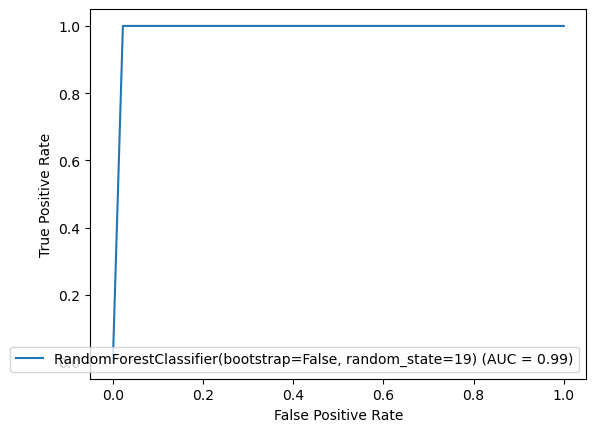

In [86]:
from sklearn.metrics import roc_curve
from sklearn import metrics
fpr,tpr,thresholds=metrics.roc_curve(y_test,pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=model)
display.plot()

In [87]:
#saving model
import joblib
joblib.dump(model,"glasstype.pkl")

['glasstype.pkl']

In [88]:
model=joblib.load("glasstype.pkl")
prediction=model.predict(x_test)
prediction

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0], dtype=int64)

In [89]:
a=np.array(y_test)
df=pd.DataFrame()
df["Predicted"]=prediction
df["Original"]=a
df

,Predicted,Original
0,1,1
1,0,0
2,1,1
3,1,1
4,1,1
...,...,...
88,0,0
89,0,0
90,1,1
91,1,0
